### Copyright-protected material, all rights reserved. (c) University of Vienna.
_Copyright Notice of the corresponding course at Moodle applies. <br> Only to be used in the MRE course._

# MRE Assignment 1 - Digital Image Processing

In this assignment you will use Python (using Pillow or OpenCV) to load, transcode and store images. You will also use the libraries to extract some basic metadata from the images and store them in a data structure for easy access.

In this notebook, you find the detailed specification. For assessment of your solution you are expected to demonstrate your implementation and answer questions in mostly textual form here.

❗ **Note:** Please make sure that all potential errors, including handling files, paths, and run-time errors are handled properly (e.g., useful error messages to users).

## Import your implementation

Import the corresponding Jupyter Notebook named "*_impl.ipynb" for this assignment here.

In [19]:
%%capture
%run MRE_A1_impl.ipynb

## Task 1.1: Image formats transformation and adding filters- 20 pts.

a. Write a Python function `JPEGImageConverter` that accepts 3 parameters: an input file or directory, and output directory name, and an optional quality parameter. If the optional quality parameter is not provided, it defaults to 100% (1.0), i.e., full quality. 

The function should be able to: 
* Read the input image(s).
* Convert the input image(s) to the JPEG file format.
* Store the converted image(s) to the output directory.
  * For BMP and PNG files it is ok to use the default image writer provided by the Python framework.
  * For JPEG a configurable writer has to be used which requires the quality parameter.
  
The output filename should conform to the following structure: <br>
  `<original name>-<quality>.jpeg`
<br>
  
**Examples:** <br>
input: `image1.gif` <br>
output: `image1.gif.jpg` <br>
output: `image1.gif-0.5.jpg`<br>
Function call: `JPEGImageConverter("image1.jpg", "./output_dir", 0.75)`



* Test your function with the files in the media directory.
* Test your function with your own images.
* Use your function to convert the provided test images (please **choose 4 images** for comparison):
  * Convert them to the following formats: JPEG (quality: 0), JPEG (quality: 0.5), JPEG (quality: 1.0).
  * Compare the file sizes of the original and the created files.
  * Compare the quality of the resulting images manually (use "GOOD", "MEDIUM", "BAD" for your subjective assessment).
  
b. Write a Python function `BlurImage` that accepts 1 parameter; an input file name. The function should add a blur filter to the input image and store the resulting blurred image in an output directory.

**Examples:** <br>
input: `image1.gif` <br>
Function call: `BlurImage("image1.jpg")`


### Demonstrate your implementation:

In [20]:
# Demonstrate your implementation here. 
# Only enter the calls to your functions here so you can demonstrate validity of your solution.

JPEGImageConverter("images/b17barb026.jpg", "./output_dir", 0.0)
JPEGImageConverter("images/b17barb026.jpg", "./output_dir", 0.5)
JPEGImageConverter("images/b17barb026.jpg", "./output_dir", 1.0)

JPEGImageConverter("images/ml-1.jpg", "./output_dir", 0.0)
JPEGImageConverter("images/ml-1.jpg", "./output_dir", 0.5)
JPEGImageConverter("images/ml-1.jpg", "./output_dir", 1.0)

JPEGImageConverter("images/m-2.jpg", "./output_dir", 0.0)
JPEGImageConverter("images/m-2.jpg", "./output_dir", 0.5)
JPEGImageConverter("images/m-2.jpg", "./output_dir", 1.0)

JPEGImageConverter("images/zebra3m.JPG", "./output_dir", 0.0)
JPEGImageConverter("images/zebra3m.JPG", "./output_dir", 0.5)
JPEGImageConverter("images/zebra3m.JPG", "./output_dir", 1.0)


BlurImage("images/b17barb026.jpg")


Comparison:
Quality 1.0:
The file-sizes for quality 1.0 are almost more than double! Rather than making the files smaller, they got bigger. This is due to to DCT technique, which makes neighboring values less coherent to each other. Because of that, Entropy-encoding-techniques aren't able to compress as much. Therefore, the files even get bigger.
As they have no 'lossy' compression, they are 'GOOD'.

Quality 0.5:
For file-size 0.5, a lot of disk-space could be saved. Mostly, it's less than half the size!
I would assess the quality of the pictures as 'MEDIUM'. At the first glance there is no difference, but as soon as you look for the details you sense the quality loss.

Quality 0.0:
Congratulations, you could save a bunch of space. The file-sizes are ridiculously small compared to the original one. Just a pity that you almost can't even tell what's in the picture.
Definetily 'BAD'!

### Additionally, answer the following questions in written form:

**1. Did the file sizes increase or decrease when you used different formats and why?**

When the quality is at 1.0, there is (almost) no loss of quality. With the quality of 0.5, the loss is easily visible. With 0.0, the picture is a complete different one. As JPEG uses Discrete Cosine Transform (DCT), it can reduce certain higher frequencies used for each block and therefore save space. The lower the quality, the more intense the quantisation of thew coefficients. More exact explanation in 3.

**2. What is the difference between lossy and lossless image formats?**

Lossless image formats such as .BMP and .PNG only use lossless compression such as Huffman coding, arithmetic encoding, or run-length encoding. Mostly, the RGB values for every pixel are saved and restored, therefore reconstructing the original image.

In lossy formats, information in the image is lost irreversibly. Altough they use genius techniques to save space and the differences aren't that visible at high quality values, further processing and usage of the image becomes harder.

**3. Explain the individual processing steps of the JPEG method following a complete process scheme as introduced in the course.**

1. The color space is changed to YCbCr, as luminance is more decisive for the human eye than the chrominance values.
2. The chrominance values get downsampled (4:2:0 or 4 Pixel-blocks), as they make the least difference.
3. Pixels get divided into 8x8 blocks.
4. Forward DCT is applied on the blocks. Each pixel in the block now stores certain frequencies in vertical or horizontal directions.
5. Now, the most important step can be applied: quantization.
    Here, the pixels (or entries in the matrix) with higher frequencies can be just set to zero, as they make the least difference for the human eye. The lower the quality value is set, the lower the threshhold for quantizing pixels.
6. Entropy encoding: As there are a lot of "0-pixels" now in the matrix espacially in the high-frequency department, we use Run-Length-Encoding and Huffman Coding to save that space (in a zig-zag manner).

**4. Considering your implementation of the `BlurImage` function, which paramaters can you add to extend the signature of your function?**

A repeat parameter could be added, which would tell the function to repeat the process a certain number of times.


## Task 1.2:  Extract / Get Image Metadata - 20 pts.

Write a Python function `ImageMetadataGenerator` which can store the following extracted metadata in a Python pandas DataFrame. The function can be called with a single parameter: either the name of an input image or the name of a directory in which various input images to be considered can be found. You can use Pillow or OpenCV to complete this task.

The function can store the following metadata: 
- width (integer)
- height (integer)
- number of image components (integer)
- number of channel (integer)
- bits per pixel (integer)
- colorSpaceType (integer)
- additional tags of your choice (max 4 tags).

**Please note:** Sometimes you have to combine other image features to calculate a certain meta-information, for example: extracting the color space or the number of channels might help to calculate bitsPerPixel or image components. bitsPerPixel is the number of bits used to represent the color information for a pixel.

**Example:** <br>
Function call:  `ImageMetadataGenerator("image1.jpg")`

### Demonstrate your Implementation:

In [21]:
display(ImageMetadataGenerator("images/"))

/var/folders/kv/rlm1b_915wsbvd995jlr3f880000gn/T/ipykernel_15609/838494532.py:56: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, newRow])
/var/folders/kv/rlm1b_915wsbvd995jlr3f880000gn/T/ipykernel_15609/838494532.py:56: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, newRow])
/var/folders/kv/rlm1b_915wsbvd995jlr3f880000gn/T/ipykernel_15609/838494532.py:56: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, newRow])
/var/folders/kv/rlm1b_915wsbvd995jlr3f880000gn/T/ipykernel_15609/838494532.py:56: FutureWarning: In a future version, object-dtype columns wit

,File,Width,Height,Components,Channels,BitsPerPixel,ColorSpaceType,Format,Pixels,HasAlphaChannel,SizeWithoutCompressionInKB
0,images/b17barb026_dithered.gif,1024,768,1,1,8,P,GIF,786432,False,768
0,images/ml-3.jpg,600,400,3,3,24,RGB,JPEG,240000,False,703
0,images/ml-1.jpg,620,342,3,3,24,RGB,JPEG,212040,False,621
0,images/zebra3m.JPG,800,532,3,3,24,RGB,JPEG,425600,False,1246
0,images/onb-2.jpg,348,348,3,3,24,RGB,JPEG,121104,False,354
0,images/b17maartent1427.gif,50,38,1,1,8,P,GIF,1900,False,1
0,images/picture_of_coati_dithered.png,1023,558,1,1,8,P,PNG,570834,False,557
0,images/onb-3.jpg,480,480,3,3,24,RGB,JPEG,230400,False,675
0,images/ml-5.jpg,600,450,3,3,24,RGB,MPO,270000,False,791
0,images/b2seaanimals005.jpg,1600,1200,3,3,24,RGB,JPEG,1920000,False,5625


## Task 1.3: Drawing circles arund objects in an image - 20 pts

a. Write a Python function `IdentifyObjects` to be called with 1 parameter; an input file. It identifies the objects or shapes in the image and draws a circle around the identified shapes.

**Example:** <br>
Input: `partyballoons-1.jpg` <br>
Function Call: `IdentifyObjects("partyballoons-1.jpg")`


b. Test your function using the image `partyballoons-2.jpg` and explain the outcome.

💡 **TIP**: Use the provided images in the directory "Task1.3" to demonstrate your solution.

### Demonstrate your Implementation:

In [22]:
#a
IdentifyObjects("images/Task1.3/partyballoons-1.jpg")

#b
IdentifyObjects("images/Task1.3/partyballoons-2.jpg")

**b. Explenation**

First, as colors don't matter here, the color is turnt into grey.
Then, the picture is slightly blurred, to allow for a more precise edge detection.
After that, the edges are identified.
We can now run the function findContours, which gives us a list of contours the program believes to be right.
Having identified the position and size of the contour, we can now draw an enclosing circle around each contour.

In our case, the program detected the outer edges of the balloons as contours.
In the lower two, it also detected the threads of the balloons as a part of the contours, in the upper three, it detected just the balloons itself.

## Task 1.4: Duplicate image finder using cosine similarity - 40 pts.

a. Write a Python function `ImageHistogramGenerator` to be called with 1 parameter; an input file. It returns the object that represents the calculated histogram.

**Example:** <br>
Input: `image1.jpg` <br>
Function Call: `ImageHistogramGenerator("image1.jpg")`

💡 **TIP**: You may plot your histogram using `matplotlib` to check if it looks correct. However, please be sure to comment out / disable your plots when calling the following `FindDuplicateImages` function, since they may cause memory issues on the JupyterLab.


b. Write a Python function `FindDuplicateImages` that can be called with three parameters:
- `inputDir1`: the path to the first directory, which contains all the images.
- `inputDir2`: the path to the second directory, which contains a subset of the images.
- `similarityThreshold`: a threshold parameter, which ranges between 0.0 to 1.0.

The algorithm:
- Generate the histograms for all images in the input directory 1 and input directory 2.
- Calculate the cosine distance between the histogram of the images in the input directory 2 and all other images in the input directory 1.

- Generate a pandas DataFrame and display it for visualization of the comparison results. The DataFrame should consist of the following three columns:

  - `inputDir1`: displays the image name in the directory.
  - `inputDir2`: displays the image name in the directory.
  - `similarityThreshold`: displays the similarity (0.0 - 1.0)

**Example:**<br>
Function call: `FindDuplicateImages("inputDir1", "inputDir2","similarityThreshold")` <br>


💡 **TIP**: To keep the memory footprint and runtime of your solution low, consider limiting the amount of files in the `inputDir2`.

### Additionally, answer the following questions in written form:

**1. Can the created histogram be used to reconstruct the image? If no, what other information would be needed?**

No, the histogram contains information solely of the color/grey value distributions. <br>
Therefore, one can't tell where these pixels would be, so it is not possible to reconsturct the image. <br>
If the postitions of the pixels would be known, it could be reconstructed. (But it doesn't really make sense) <br>

**2. Explain the differences between an individual color histogram, a combined color histogram and an intensity histogram.** <br>
&emsp; **a) What information is displayed in each of these diagrams?** <br> 
<br>
Individual Color Histogram: here, the intensity distribution of each/one individual color channel is represented (usually R,G,B). <br>
Combined Color Histogram: here, two or more color channels get combined (average of two distributions). <br>
Intensity Histogram: here, overall intensities of pixels is represented, showing the overall brightness and contrast. <br>
<br>

&emsp; **b) What histogram type did we use?** <br>
 <br>
 Depends on the image: From RGB pictures, individual color histograms got calculated, containing histograms for every color. <br>
 From them, intensity histograms got calculated, so that we can also compare them to greyscale images.
 For Greyscale images, intensity histograms were calculated.

**3. Explain the concept of histogram bins.**

Bins represent the values. In Images: for each bin/value (0-255), how many pixels are there? This way, they get distributed.

### Demonstrate your Implementation:

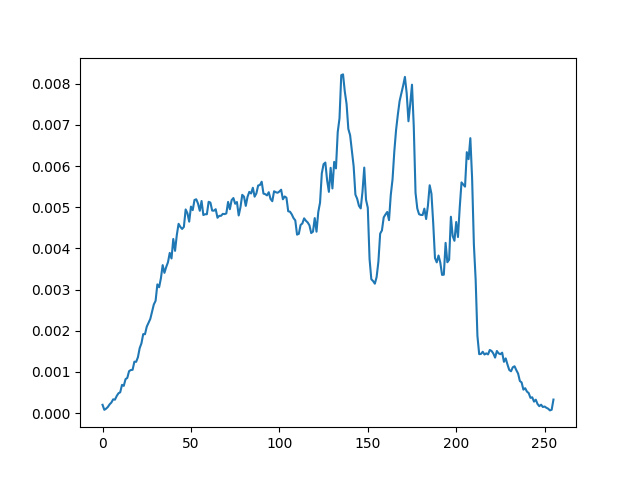

,inputDir1,inputDir2,similarityThreshold
0,picture_of_coati_dithered.png,picture_of_coati_dithered.png,1.000000
0,onb-3.jpg,onb-3.jpg,1.000000
0,onb-1.jpg,onb-3.jpg,0.787397
0,ml_2.jpg,onb-3.jpg,0.633771
0,onb-3.jpg,onb-1.jpg,0.787397
0,onb-1.jpg,onb-1.jpg,1.000000
0,onb-3.jpg,ml_2.jpg,0.633771
0,ml_2.jpg,ml_2.jpg,1.000000
0,the_real_firefox_dithered.bmp,the_real_firefox_dithered.bmp,1.000000


In [24]:
histogram = ImageHistogramGenerator("images/vie-1.jpg")
plt.clf()
plt.plot(histogram)
plt.show()

FindDuplicateImages("inputDir1/", "inputDir2/", 0.6)